# TestCase 4

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config4.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 4
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
high_degree = 10

In [4]:
assert testcase == 4
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
if version==1:
    from testcases.networks.test_2D.test_4.test_4_v1 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase4
problem = TestCase4(version=version)

Using device: cpu
torch loaded; device is cpu


2
[[-0.5, 0.500001], [-0.5, 0.500001]]
[[-0.5, 0.500001], [-0.5, 0.500001]]
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe4.pth
network loaded
Error  tensor([0.0006])


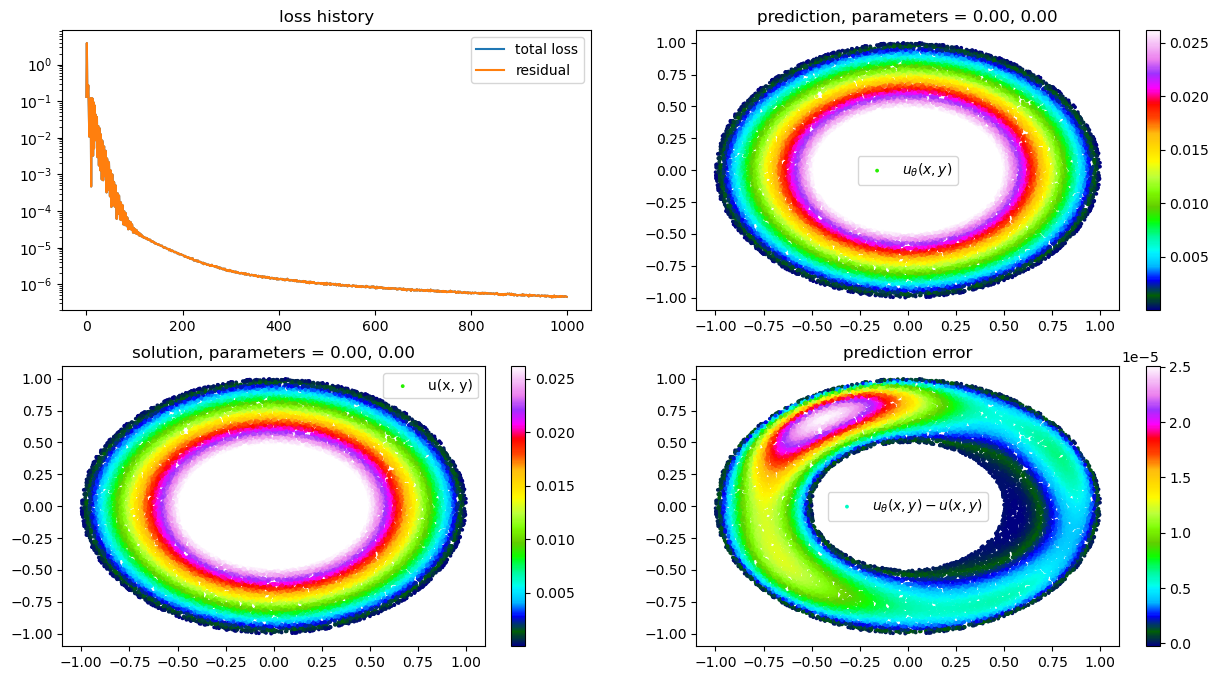

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [ ]:
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all
from modfenics.error_estimations.compare import plot_Corr_vs_FEM_alldeg
from modfenics.error_estimations.compare import save_tab_alldeg_allM

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
param_num = config["error_estimations"]["param_num"]     
result_dir = testcase_dir + "/cvg/param"+str(param_num)+"/"
create_tree(result_dir)

### Run FEM

In [12]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
Time to generate V_ex:  20.82855486869812
Time to generate mesh:  0.00421452522277832
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Time to assemble the matrix :  3.446190595626831
Time to solve the system : 0.0017418861389160156
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
Time to compute the error : 3.65228009223938
nb_vert=16, norme_L2=0.00843484940465124
Time to generate mesh:  0.012403011322021484
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Time to assemble the matrix :  0.020281553268432617
Time to solve the system : 0.012162923812866211
Building point search tree to accelerate distance queries.
Computed bounding box t

## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/FEM_case4_v1_param1_degree1.csv
## Run error estimation with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
Time to generate V_ex:  20.032175064086914
Time to generate mesh:  0.004185199737548828
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Time to assemble the matrix :  0.028354167938232422
Time to solve the system : 0.015182971954345703
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
Time to compute the error : 5.079266548156738
nb_vert=16, norme_L2=0.0001672090471707241
Time to generate mesh:  0.012368440628051758
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Time to assemble the matrix :  0.0230567455291

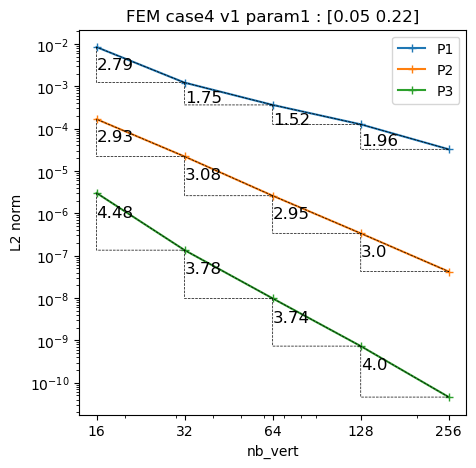

In [13]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

### Run Add

In [14]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Run error estimation with Corr (add) for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
Time to generate V_ex:  20.228404998779297
Time to generate mesh:  0.004216670989990234
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time to assemble the matrix :  1.0016396045684814
Time to solve the system : 0.005442380905151367
u_theta_Vex
u_ex
uex_Vex
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
Time to compute the error : 5.570481061935425
nb_vert=16, norme_L2=3.577204830786597e-05
Time to generate mesh:  0.012412071228027344
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Time to assemble the matrix :  0.3869752883911133
Time to solve the system : 0.

## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/Corr_case4_v1_param1_degree1.csv
## Run error estimation with Corr (add) for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
Time to generate V_ex:  20.59114718437195
Time to generate mesh:  0.0042536258697509766
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time to assemble the matrix :  1.7735555171966553
Time to solve the system : 0.01912713050842285
u_theta_Vex
u_ex
uex_Vex
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Time to compute the error : 7.006789922714233
nb_vert=16, norme_L2=2.254341785383592e-06
Computed bounding box tree with 746807 nodes for 373404 points.

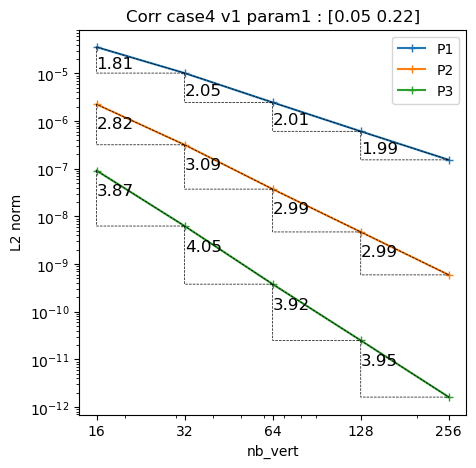

In [15]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

### Save results

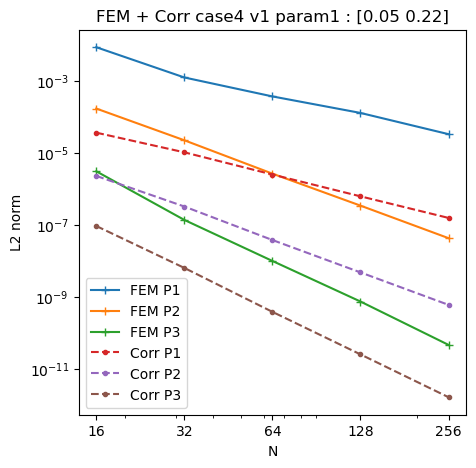

In [ ]:
plot_Corr_vs_FEM_alldeg(param_num,problem,result_dir=result_dir)

In [ ]:
save_tab_alldeg_allM(param_num,problem,result_dir=result_dir)

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:185: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp